In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, os


In [56]:
df = pd.read_csv('matches1.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4800 non-null   int64  
 1   date          4800 non-null   object 
 2   time          4800 non-null   object 
 3   comp          4800 non-null   object 
 4   round         4800 non-null   object 
 5   day           4800 non-null   object 
 6   venue         4800 non-null   object 
 7   result        4800 non-null   object 
 8   gf            4800 non-null   float64
 9   ga            4800 non-null   float64
 10  opponent      4800 non-null   object 
 11  xg            4800 non-null   float64
 12  xga           4800 non-null   float64
 13  poss          4800 non-null   float64
 14  attendance    3916 non-null   float64
 15  captain       4800 non-null   object 
 16  formation     4800 non-null   object 
 17  referee       4800 non-null   object 
 18  match report  4800 non-null 

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4800.0,23.081250,14.568935,0.0,11.0,22.0,35.0,61.0
gf,4800.0,1.390208,1.281258,0.0,0.0,1.0,2.0,9.0
ga,4800.0,1.390208,1.281258,0.0,0.0,1.0,2.0,9.0
xg,4800.0,1.344562,0.801746,0.0,0.7,1.2,1.8,5.9
xga,4800.0,1.344562,0.801746,0.0,0.7,1.2,1.8,5.9
poss,4800.0,50.001250,12.806997,18.0,40.0,50.0,60.0,82.0
attendance,3916.0,38512.472932,17024.905791,2000.0,25434.0,32185.5,53222.0,83222.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4800.0,12.380000,5.428020,0.0,8.0,12.0,16.0,36.0
sot,4800.0,4.118125,2.432246,0.0,2.0,4.0,6.0,15.0


In [59]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\ahmet\AppData\Local\Temp\ipykernel_8184\242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [60]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2022,Manchester City
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,1.0,0.3,59.0,NaN,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2022,Manchester City
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2022,Manchester City
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,2.2,1.4,68.0,52899.0,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2022,Manchester City
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,3.6,0.9,68.0,62475.0,Kyle Walker,4-2-3-1,Andy Madley,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1.0,0.0,Manchester Utd,0.7,0.7,30.0,75095.0,Chris Brunt,4-4-1-1,Paul Tierney,Match Report,NaN,10.0,4.0,18.1,0.0,0,0,2016,West Bromwich Albion
4796,39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2.0,2.0,Liverpool,1.3,1.3,39.0,24520.0,Chris Brunt,4-4-1-1,Stuart Attwell,Match Report,NaN,13.0,6.0,17.7,0.0,0,0,2016,West Bromwich Albion
4797,40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1.0,0.0,Newcastle Utd,0.7,1.8,38.0,52283.0,Chris Brunt,4-4-1-1,David Coote,Match Report,NaN,9.0,2.0,20.1,0.0,0,0,2016,West Bromwich Albion
4798,41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1.0,0.0,Tottenham,1.6,1.2,26.0,23685.0,Chris Brunt,4-4-1-1,Mike Jones,Match Report,NaN,9.0,1.0,10.2,0.0,0,0,2016,West Bromwich Albion


In [61]:
df.shape

(4800, 28)

In [62]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       884
captain            0
formation          0
referee            0
match report       0
notes           4800
sh                 0
sot                0
dist               3
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [63]:
df = df.drop_duplicates()


In [82]:
df["team"].value_counts()

team
Manchester City             240
Everton                     240
Arsenal                     240
Tottenham Hotspur           240
Manchester United           240
Newcastle United            240
Brighton and Hove Albion    240
West Ham United             240
Chelsea                     240
Crystal Palace              240
Liverpool                   240
Southampton                 228
Leicester City              228
Burnley                     202
Wolverhampton Wanderers     202
Bournemouth                 164
Aston Villa                 164
Watford                     152
Fulham                      126
Leeds United                114
Sheffield United             88
Brentford                    88
West Bromwich Albion         76
Huddersfield Town            76
Norwich City                 76
Nottingham Forest            50
Name: count, dtype: int64

In [89]:
value_counts = df['team'].value_counts()
df =  df[~df['team'].isin(value_counts.index[value_counts < 50])]

In [93]:
value_counts = df['opponent'].value_counts()
df =  df[~df['opponent'].isin(value_counts.index[value_counts < 50])]

Nottingham Forest            50
West Bromwich Albion         38
Luton Town                   12

bu takimlar cikarilabilir

In [94]:
df["opponent"].value_counts()

opponent
Crystal Palace     234
Arsenal            234
Manchester City    234
Newcastle Utd      234
Tottenham          233
West Ham           233
Brighton           233
Manchester Utd     233
Liverpool          233
Chelsea            233
Everton            233
Leicester City     222
Southampton        222
Wolves             199
Burnley            195
Aston Villa        163
Bournemouth        158
Watford            146
Fulham             123
Leeds United       114
Brentford           88
Sheffield Utd       88
Norwich City        76
West Brom           72
Huddersfield        70
Name: count, dtype: int64

In [67]:
df['round'] = df['round'].str[-2:].astype(int)


In [68]:
del df["comp"]

In [84]:
del df["match report"]

In [69]:
del df["notes"]

In [70]:
del df["attendance"]

In [71]:
del df["Unnamed: 0"]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, 0 to 4799
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4674 non-null   object 
 1   time        4674 non-null   object 
 2   round       4674 non-null   int32  
 3   day         4674 non-null   object 
 4   venue       4674 non-null   object 
 5   result      4674 non-null   object 
 6   gf          4674 non-null   float64
 7   ga          4674 non-null   float64
 8   opponent    4674 non-null   object 
 9   xg          4674 non-null   float64
 10  xga         4674 non-null   float64
 11  poss        4674 non-null   float64
 12  captain     4674 non-null   object 
 13  formation   4674 non-null   object 
 14  referee     4674 non-null   object 
 15  sh          4674 non-null   float64
 16  sot         4674 non-null   float64
 17  dist        4672 non-null   float64
 18  fk          4674 non-null   float64
 19  pk          4674 non-null   int6

In [74]:
#df["date"] = pd.to_datetime(df["date"])

In [75]:
df["target"] = (df["result"] == "W").astype("int")

In [76]:
df["venue_code"] = df["venue"].astype("category").cat.codes

In [77]:
df["opp_code"] = df["opponent"].astype("category").cat.codes

In [78]:
df["format_code"] = df["formation"].astype("category").cat.codes

In [107]:
df["referee_code"] = df["referee"].astype("category").cat.codes

In [112]:
df["day_code"] = df["day"].astype("category").cat.codes

In [79]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [111]:
df["season"].value_counts()

season
2020    760
2019    760
2018    760
2021    722
2017    684
2016    612
2022    205
Name: count, dtype: int64

In [128]:
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team,target,venue_code,opp_code,format_cat,hour,referee_code,day_code
0,2023-08-11,20:00,1,Fri,Away,W,3.0,0.0,Burnley,1.9,0.3,65.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0,0,2022,Manchester City,1,0,5,12,20,4,0
1,2023-08-19,20:00,2,Sat,Home,W,1.0,0.0,Newcastle Utd,1.0,0.3,59.0,Kyle Walker,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0,0,2022,Manchester City,1,1,18,12,20,25,2
2,2023-08-27,14:00,3,Sun,Away,W,2.0,1.0,Sheffield Utd,3.5,0.7,79.0,Kyle Walker,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0,1,2022,Manchester City,1,0,21,12,14,9,3
3,2023-09-02,15:00,4,Sat,Home,W,5.0,1.0,Fulham,2.2,1.4,68.0,Kyle Walker,4-2-3-1,Michael Oliver,6.0,4.0,14.8,0.0,1,1,2022,Manchester City,1,1,10,12,15,17,2
4,2023-09-16,15:00,5,Sat,Away,W,3.0,1.0,West Ham,3.6,0.9,68.0,Kyle Walker,4-2-3-1,Andy Madley,29.0,13.0,16.4,1.0,0,0,2022,Manchester City,1,0,28,12,15,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,2018-04-15,16:00,34,Sun,Away,W,1.0,0.0,Manchester Utd,0.7,0.7,30.0,Chris Brunt,4-4-1-1,Paul Tierney,10.0,4.0,18.1,0.0,0,0,2016,West Bromwich Albion,1,0,17,16,16,23,3
4796,2018-04-21,12:30,35,Sat,Home,D,2.0,2.0,Liverpool,1.3,1.3,39.0,Chris Brunt,4-4-1-1,Stuart Attwell,13.0,6.0,17.7,0.0,0,0,2016,West Bromwich Albion,0,1,14,16,12,30,2
4797,2018-04-28,15:00,36,Sat,Away,W,1.0,0.0,Newcastle Utd,0.7,1.8,38.0,Chris Brunt,4-4-1-1,David Coote,9.0,2.0,20.1,0.0,0,0,2016,West Bromwich Albion,1,0,18,16,15,7,2
4798,2018-05-05,15:00,37,Sat,Home,W,1.0,0.0,Tottenham,1.6,1.2,26.0,Chris Brunt,4-4-1-1,Mike Jones,9.0,1.0,10.2,0.0,0,0,2016,West Bromwich Albion,1,1,25,16,15,20,2


In [80]:
#df["day_code"] = df["date"].dt.dayofweek

In [113]:
df[df.duplicated()]

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team,target,venue_code,opp_code,format_cat,hour,referee_code,day_code


In [127]:
filtered = df[df['target'] == 1]['team'].value_counts()

total = df['team'].value_counts()


percentage = filtered_value_counts / total_value_counts
percentage.sort_values(ascending=False)



team
Manchester City             0.757576
Liverpool                   0.660870
Arsenal                     0.528139
Manchester United           0.526087
Tottenham Hotspur           0.519481
Chelsea                     0.478261
Aston Villa                 0.387500
Leicester City              0.386364
Brentford                   0.364706
Wolverhampton Wanderers     0.360406
West Ham United             0.347826
Newcastle United            0.340517
Everton                     0.329004
Crystal Palace              0.307359
Leeds United                0.294643
Brighton and Hove Albion    0.294372
Burnley                     0.273196
Bournemouth                 0.262821
Southampton                 0.259091
Sheffield United            0.252874
Watford                     0.246575
Nottingham Forest           0.244898
Fulham                      0.214876
Huddersfield Town           0.171429
West Bromwich Albion        0.152778
Norwich City                0.131579
Name: count, dtype: float64

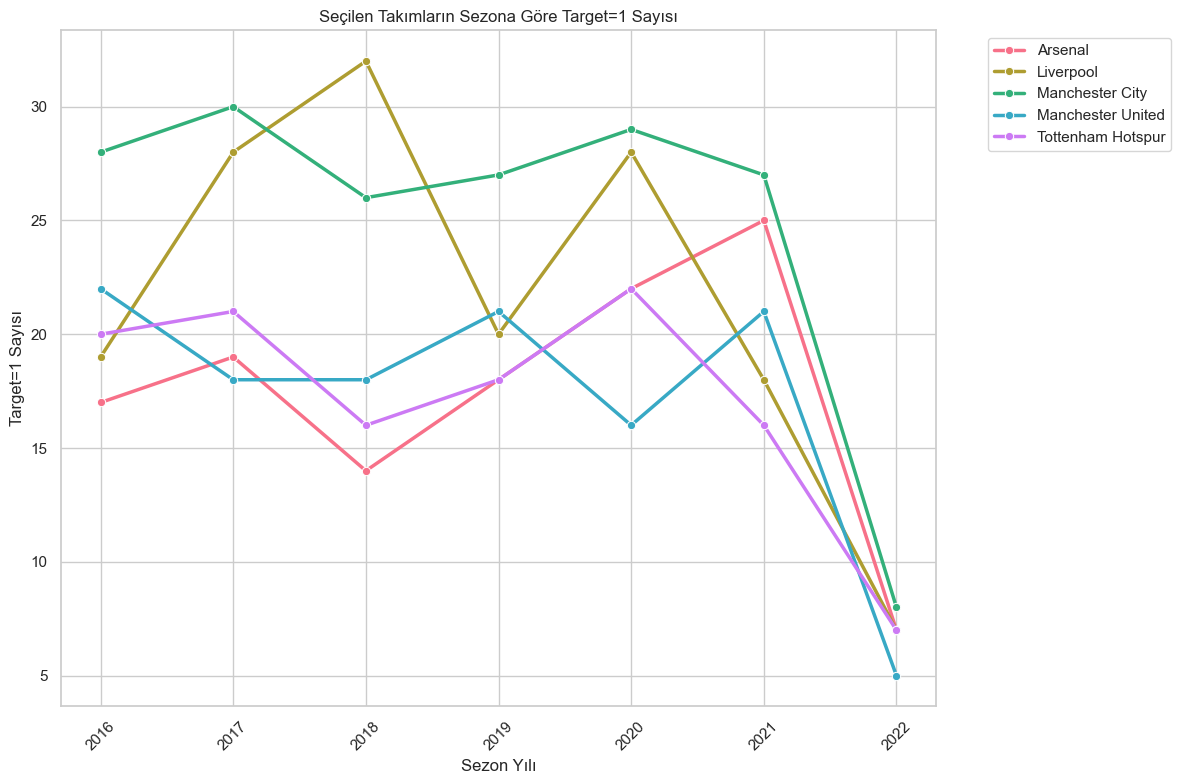

In [131]:
selected_teams = ['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', 'Tottenham Hotspur']
filtered_df = df[df['team'].isin(selected_teams)]


target_1_by_team_season = filtered_df[filtered_df['target'] == 1].groupby(['team', 'season'])['target'].sum().reset_index()


plt.figure(figsize=(12, 8))
sns.set_palette("husl", len(selected_teams)) 

sns.lineplot(data=target_1_by_team_season, x='season', y='target', hue='team', marker='o', linewidth=2.5)
plt.title('Seçilen Takımların Sezona Göre Target=1 Sayısı')
plt.xlabel('Sezon Yılı')
plt.ylabel('Target=1 Sayısı')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()

plt.show()